In [17]:
import numpy as np
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis = 1)



### 1- Folha Salarial

In [21]:
funcionarios_df['Salario Total'] =  funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
display(funcionarios_df)
folha_salarial = funcionarios_df['Salario Total'].sum()
print(f"A folha salarial é R${folha_salarial}")

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Salario Total
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística,19104.18
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial,7875.92
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo,42616.32
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial,9605.88


A folha salarial é R$2717493.22


### 2- Faturamento Empresa

In [31]:
faturamento_df= servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on ='ID Cliente')
faturamento_df['Faturamento'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
display(faturamento_df)
print(f"O seu faturamento total foi de R${sum(faturamento_df['Faturamento'])}")

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


O seu faturamento total foi de R$5519160


### 3- % Funcionarios que fechou contrato

In [37]:
qt_funcionarios_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())
qt_funcionarios_total = len(funcionarios_df['ID Funcionário'])
print(f'{qt_funcionarios_fecharamcontrato/qt_funcionarios_total:.2%} dos funcionarios fecharam contratos')

86.84% dos funcionarios fecharam contratos


### 4- Quantidade de Contratos por area

In [47]:
contratos_por_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
qt_contratos_df = contratos_por_area_df['Area'].value_counts()
print(qt_contratos_df)

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


### 5- Funcionario por area

<Axes: ylabel='Area'>

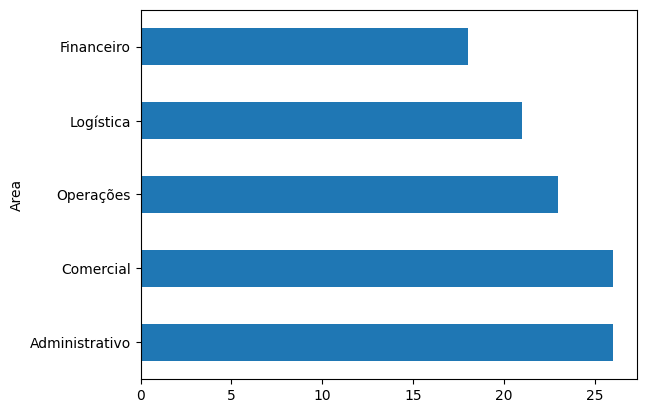

In [53]:
funcionarios_area = funcionarios_df['Area'].value_counts()
funcionarios_area.plot(kind='barh')

### 6- Ticket Medio Mensal

In [55]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print(f'Seu ticket médio mensal é R${ticket_medio:,.2f}')

Seu ticket médio mensal é R$2,502.56
